In [17]:
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()
# Maths
import math

# Set the options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [18]:
import warnings            #to ignore/avoid warnings on outputs
warnings.filterwarnings('ignore')

In [19]:
df3=pd.read_csv('StrikesDataML.csv')

In [37]:
df3.head()

,SEASON,DAMAGE_RISK,AIRPORT,INDICATED_DAMAGE,SKY,PRECIPITATION,TIME_OF_DAY,AIRCRAFT,NUM_ENGS,TYPE_ENG,PHASE_OF_FLIGHT,DAMAGE_LEVEL,FAAREGION,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS
0,0.0,1.0,528.0,0.0,0.0,4.0,3.0,173.0,1.0,0.0,0.0,3.0,3.0,7.0,1.0,-1.0,-1.0
1,2.0,3.0,1280.0,0.0,0.0,4.0,1.0,56.0,3.0,3.0,6.0,3.0,7.0,5.0,6.0,5.0,-1.0
2,2.0,3.0,373.0,0.0,0.0,4.0,1.0,75.0,2.0,3.0,6.0,3.0,3.0,1.0,1.0,-1.0,-1.0
3,0.0,0.0,1325.0,1.0,0.0,4.0,1.0,113.0,1.0,0.0,0.0,4.0,4.0,7.0,1.0,-1.0,-1.0
4,1.0,1.0,622.0,0.0,0.0,4.0,3.0,56.0,3.0,3.0,0.0,3.0,7.0,5.0,6.0,5.0,-1.0


In [21]:
df3['AIRPORT']=np.array(df3['AIRPORT'])

In [22]:
df3['AIRPORT']

0                      DELAWARE COUNTY REGIONAL ARPT
1              LOUIE ARMSTRONG NEW ORLEANS INTL ARPT
2                           CHICAGO O'HARE INTL ARPT
3                                 MANCHESTER AIRPORT
4                                  EL PASO INTL ARPT
                             ...                    
255924                      CHICAGO O'HARE INTL ARPT
255925                                       UNKNOWN
255926                         AUSTIN-BERGSTROM INTL
255927                    PORTLAND INTL JETPORT (ME)
255928    GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT
Name: AIRPORT, Length: 255929, dtype: object

In [23]:
#define ordinal encoding
encoder=OrdinalEncoder()
#transform data
Airport=np.array(df3['AIRPORT'])
Airport=Airport.reshape(-1,1)
df3['AIRPORT']=encoder.fit_transform(Airport)



In [24]:
encoder=OrdinalEncoder()
#transform data
Season=np.array(df3['SEASON'])
Season=Season.reshape(-1,1)
df3['SEASON']=encoder.fit_transform(Season)

In [25]:
encoder=OrdinalEncoder()
#transform data
Damage_Risk=np.array(df3['DAMAGE_RISK'])
Damage_Risk=Damage_Risk.reshape(-1,1)
df3['DAMAGE_RISK']=encoder.fit_transform(Damage_Risk)

In [26]:
encoder=OrdinalEncoder()
#transform data
Indicated_Damage=np.array(df3['INDICATED_DAMAGE'])
Indicated_Damage=Indicated_Damage.reshape(-1,1)
df3['INDICATED_DAMAGE']=encoder.fit_transform(Indicated_Damage)

In [27]:
encoder=OrdinalEncoder()
#transform data
Sky=np.array(df3['SKY'])
Sky=Sky.reshape(-1,1)
df3['SKY']=encoder.fit_transform(Sky)

In [28]:
encoder=OrdinalEncoder()
#transform data
Precipitation=np.array(df3['PRECIPITATION'])
Precipitation=Precipitation.reshape(-1,1)
df3['PRECIPITATION']=encoder.fit_transform(Precipitation)

In [29]:
encoder=OrdinalEncoder()
#transform data
Time_of_day=np.array(df3['TIME_OF_DAY'])
Time_of_day=Time_of_day.reshape(-1,1)
df3['TIME_OF_DAY']=encoder.fit_transform(Time_of_day)

In [30]:
encoder=OrdinalEncoder()
#transform data
Aircraft=np.array(df3['AIRCRAFT'])
Aircraft=Aircraft.reshape(-1,1)
df3['AIRCRAFT']=encoder.fit_transform(Aircraft)

In [31]:
encoder=OrdinalEncoder()
#transform data
Type_of_Eng=np.array(df3['TYPE_ENG'])
Type_of_Eng=Type_of_Eng.reshape(-1,1)
df3['TYPE_ENG']=encoder.fit_transform(Type_of_Eng)

In [32]:
encoder=OrdinalEncoder()
#transform data
Phase_of_flight=np.array(df3['PHASE_OF_FLIGHT'])
Phase_of_flight=Phase_of_flight.reshape(-1,1)
df3['PHASE_OF_FLIGHT']=encoder.fit_transform(Phase_of_flight)

In [34]:
encoder=OrdinalEncoder()
#transform data
Damage_Level=np.array(df3['DAMAGE_LEVEL'])
Damage_Level=Damage_Level.reshape(-1,1)
df3['DAMAGE_LEVEL']=encoder.fit_transform(Damage_Level)

In [35]:
encoder=OrdinalEncoder()
#transform data
FAAREGION=np.array(df3['FAAREGION'])
FAAREGION=FAAREGION.reshape(-1,1)
df3['FAAREGION']=encoder.fit_transform(FAAREGION)

In [36]:
df3.drop('Unnamed: 0', axis=1, inplace=True)

# SCALING

In [38]:
scaler=StandardScaler()
X=df3.drop('INDICATED_DAMAGE', axis=1)
y=df3['INDICATED_DAMAGE']

In [39]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
imp=pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
imp
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
DAMAGE_LEVEL,0.306910
TYPE_ENG,0.057807
NUM_ENGS,0.057248
DAMAGE_RISK,0.057205
AIRCRAFT,0.054139
ENG_4_POS,0.054015
PRECIPITATION,0.052965
ENG_3_POS,0.046337
ENG_1_POS,0.034162
TIME_OF_DAY,0.030458


In [40]:
# Train Test Split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model Building

In [43]:
input_ml_algo='LR'

In [44]:
#Select the algorith according to the input provided
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [45]:
model=model_to_use('LR')
model

LogisticRegression()

In [46]:
#training the model
model.fit(X_train, y_train)
model

LogisticRegression()

In [47]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]  
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 0. 0. 0.]
Y probability predicted :  [0.004514165797741957, 0.008298054323384846, 0.037037086135602575, 0.005869215429829556, 0.028989141601183138]



 Accuracy Score : 
  0.9727269175165084

 AUC Score : 
  0.811536290014104

 Confusion Matrix : 
  [[71225     1]
 [ 2093  3460]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     71226
         1.0       1.00      0.62      0.77      5553

    accuracy                           0.97     76779
   macro avg       0.99      0.81      0.88     76779
weighted avg       0.97      0.97      0.97     76779


 ROC Curve : 
 


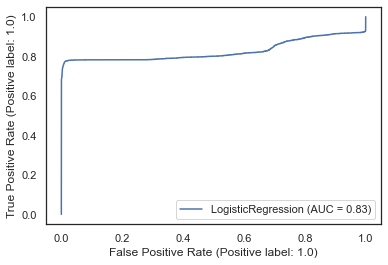

In [48]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [49]:
model=model_to_use('RF')
model

RandomForestClassifier()

In [50]:
#training the model
model.fit(X_train, y_train)
model

RandomForestClassifier()

In [51]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]  
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 0. 0. 0.]
Y probability predicted :  [0.0, 0.0, 0.0, 0.0, 0.0]



 Accuracy Score : 
  0.9997916096849399

 AUC Score : 
  0.9987253803163406

 Confusion Matrix : 
  [[71224     2]
 [   14  5539]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71226
         1.0       1.00      1.00      1.00      5553

    accuracy                           1.00     76779
   macro avg       1.00      1.00      1.00     76779
weighted avg       1.00      1.00      1.00     76779


 ROC Curve : 
 


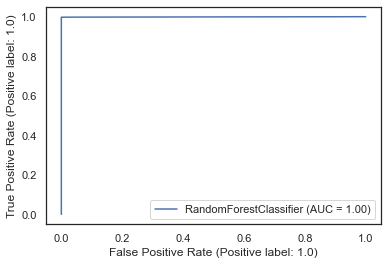

In [52]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [53]:
model=model_to_use('DT')
model

DecisionTreeClassifier()

In [54]:
#training the model
model.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [55]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]  
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 0. 0. 0.]
Y probability predicted :  [0.0, 0.0, 0.0, 0.0, 0.0]



 Accuracy Score : 
  0.9995832193698798

 AUC Score : 
  0.99811493271742

 Confusion Matrix : 
  [[71214    12]
 [   20  5533]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71226
         1.0       1.00      1.00      1.00      5553

    accuracy                           1.00     76779
   macro avg       1.00      1.00      1.00     76779
weighted avg       1.00      1.00      1.00     76779


 ROC Curve : 
 


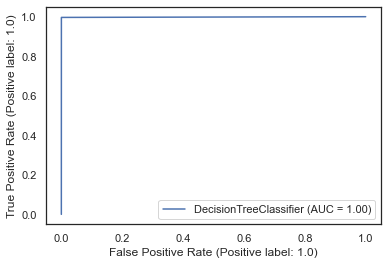

In [56]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [57]:
model=model_to_use('XGBC')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [58]:
#training the model
model.fit(X_train, y_train)
model

[16:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]  
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 0. 0. 0.]
Y probability predicted :  [4.6107508e-07, 7.28919e-07, 1.0904274e-05, 4.4050967e-07, 2.2460206e-05]



 Accuracy Score : 
  0.9998046340796312

 AUC Score : 
  0.9987324002248009

 Confusion Matrix : 
  [[71225     1]
 [   14  5539]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71226
         1.0       1.00      1.00      1.00      5553

    accuracy                           1.00     76779
   macro avg       1.00      1.00      1.00     76779
weighted avg       1.00      1.00      1.00     76779


 ROC Curve : 
 


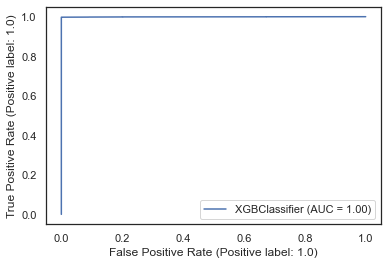

In [60]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [61]:
model=model_to_use('LGBMC')
model

LGBMClassifier()

In [62]:
#training the model
model.fit(X_train, y_train)
model

LGBMClassifier()

In [63]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]  
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 0. 0. 0.]
Y probability predicted :  [4.185971527052094e-06, 3.6888660774245224e-06, 3.0557746532204475e-05, 3.817537744565699e-06, 2.215248749607551e-05]


# Model Evaluation


 Accuracy Score : 
  0.9997916096849399

 AUC Score : 
  0.9987253803163406

 Confusion Matrix : 
  [[71224     2]
 [   14  5539]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71226
         1.0       1.00      1.00      1.00      5553

    accuracy                           1.00     76779
   macro avg       1.00      1.00      1.00     76779
weighted avg       1.00      1.00      1.00     76779


 ROC Curve : 
 


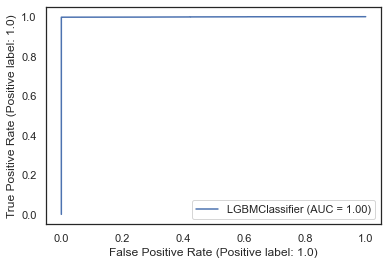

In [64]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

# Optimization - Handling Imbalance

In [65]:
ros=RandomOverSampler()

X_ros, y_ros=ros.fit_resample(X,y)

y_ros.value_counts()

0.0    237500
1.0    237500
Name: INDICATED_DAMAGE, dtype: int64

In [66]:
X=X_ros
y=y_ros

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model Building

In [70]:
input_ml_algo='XGBC'

In [71]:
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [72]:
model=model_to_use('XGBC')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [73]:
model.fit(X_train, y_train)
model

[16:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]     
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 1. 1. 1.]
Y probability predicted :  [3.2431326e-05, 1.6473839e-06, 1.2730426e-06, 0.99999857, 4.97814e-06]



 Accuracy Score : 
  0.9998315789473684

 AUC Score : 
  0.999831511733121

 Confusion Matrix : 
  [[71327     8]
 [   16 71149]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71335
         1.0       1.00      1.00      1.00     71165

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500


 ROC Curve : 
 


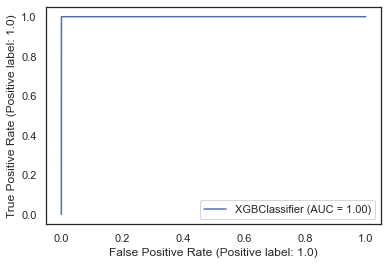

In [75]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

# Hyper Parameter Tuning

In [76]:
param_grid_decision_tree={'criterion':['gini','entropy'],
                         'max_depth':[10,15,20,30,40,50],
                         'min_samples_leaf':[1,2,5]}

#Define the parameters grid for random forest
param_grid_random_forest={'max_depth': [10,20,40],
                         'n_estimators': [100,200,300],
                         'min_samples_leaf': [1,2,5]}

#Define the parameters grid for XGBoost
param_grid_xgb={'min_child_weight': [1,5,10],
               'gamma': [0,1],
               'max_depth': [5,10],
               'learning_rate': [0.05,0.1]}

#Define the parameters grid for LGBM
param_grid_lgbm={'n_estimator':[100,200],
                'num_leaves': [256,128],
                'max_depth':[5,8,10],
                'learning_rate': [0.05,0.1]}

In [77]:
def param(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
        param_grid=param_grid_decision_tree
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
        param_grid=param_grid_random_forest
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
        param_grid=param_grid_xgb
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
        param_grid=param_grid_lgbm
    return param_grid

In [78]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [79]:
#to check model parameters
model.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [80]:
grid=GridSearchCV(model,param_grid_decision_tree,refit=True,verbose=3, n_jobs=-1)

#fit the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[17:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                              

In [81]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

In [82]:
y_pred=grid.predict(X_test)

#predict probability for test dataset
y_pred_prod=grid.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0. 0. 0. ... 1. 1. 1.]
Y probability predicted :  [0.99999493, 0.99999607, 0.9999988, 1.5497208e-06, 0.9999932]



 Accuracy Score : 
  0.9998877192982456

 AUC Score : 
  0.9998877693693585

 Confusion Matrix : 
  [[71324    11]
 [    5 71160]]

 Classification Report : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71335
         1.0       1.00      1.00      1.00     71165

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500


 ROC Curve : 
 


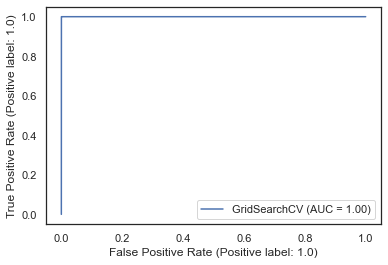

In [83]:
compute_evaluation_metric(grid, X_test, y_test,y_pred,y_pred_prod)

In [84]:
import pickle

In [85]:
pickle.dump(model, open('bird_model.pkl','wb'))

pickle.dump(scaler, open('bird_scaler.pkl','wb'))

# Streamlit

In [5]:
%%writefile StrikesPrediction.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image

st.write("""
# STRIKES PREDICTION APP
""")
image=Image.open('bird_strike.jpg')
st.image(image, width=500)

model=pickle.load(open('bird_model.pkl','rb'))

scaler=pickle.load(open('bird_scaler.pkl','rb'))

st.sidebar.header('Post Strike Parameters')

def user_input_features():
    Season=st.selectbox('Choose season',('Fall','Summer','Spring','Winter'))
    if Season=='Fall':
        Season=4
    if Season=='Summer':
        Season=3
    if Season=='Spring':
        Season=2                   
    else:
        Season=1
    Sky=st.selectbox('Any clouds?',('No Cloud', 'Overcast', 'Some Cloud'))   
    if Sky=='No Cloud':
        Sky=3
    if Sky=='Overcast':
        Sky=2
    else:
        Sky=1
    Precipitation=st.selectbox('What is the precipitation status?',('None', 'Fog', 'Rain', 'Snow', 'Fog, Rain', 'Rain, Snow',
       'Fog, Snow', 'Fog, Rain, Snow'))
    if Precipitation=='None':
        Precipitation=8
    if Precipitation=='Fog':
        Precipitation=7
    if Precipitation=='Rain':
        Precipitation=6
    if Precipitation=='Snow':
        Precipitation=5 
    if Precipitation=='Fog,Rain':
        Precipitation=4
    if Precipitation=='Rain,Snow':
        Precipitation=3
    if Precipitation=='Fog,Snow':
        Precipitation=2
    else:
        Precipitation=1
    Time_of_day=st.selectbox('When is the flight scheduled for?',('Night','Day', 'Dawn', 'Dusk'))
    if Time_of_day=='Night':
        Time_of_day=4
    if Time_of_day=='Day':
        Time_of_day=3
    if Time_of_day=='Dawn':
        Time_of_day=2
    else:
        Time_of_day=1
    Num_Engs =st.selectbox('How many engines has the aircraft?',('1.','2.', '3.', '4.'))
    if Num_Engs=='1.':
        Num_Engs=4
    if Num_Engs=='2.':
        Num_Engs=3
    if Num_Engs=='3.':
        Num_Engs=2
    else:
        Num_Engs=1
    Type_Engs=st.selectbox('What type of engine does the aircraft have?',('A', 'D', 'C', 'F', 'B', 'Y', 'E'))
    if Type_Engs=='A':
         Type_Engs=7
    if Type_Engs=='D':
         Type_Engs=6                   
    if Type_Engs=='C':
        Type_Engs=5
    if Type_Engs=='F':
        Type_Engs=4
    if Type_Engs=='B':
        Type_Engs=3
    if Type_Engs=='Y':
        Type_Engs=2
    else:
        Type_Engs=1
    FAAREGION=st.selectbox('What region is the airport situated?',('AGL', 'ASW', 'ANE', 'ANM', 
                                                                   'ASO', 'AWP', 'AEA', 'ACE', 'AAL','FGN'))
    if FAAREGION=='AGL':
        FAAREGION=10
    if FAAREGION=='ASW':
        FAAREGION=9
    if FAAREGION=='ANE':
        FAAREGION=8
    if FAAREGION=='ANM':
        FAAREGION=7
    if FAAREGION=='ASO':
        FAAREGION=6
    if FAAREGION=='AWP':
        FAAREGION=5
    if FAAREGION=='AEA':
        FAAREGION=4
    if FAAREGION=='ACE':
        FAAREGION=3
    if FAAREGION=='FGN':
        FAAREGION=2
    else:
        FAAREGION=1
    DAMAGE_RISK=st.sidebar.selectbox('Risk Level',('High Risk','Potential Risk','Low Risk','Undetermined'))
    if DAMAGE_RISK=='High Risk':
        DAMAGE_RISK=4
    if DAMAGE_RISK=='Potential Risk':
        DAMAGE_RISK=3
    if DAMAGE_RISK=='Low Risk':
        DAMAGE_RISK=2
    else:
        DAMAGE_RISK=1
    DAMAGE_LEVEL=st.sidebar.selectbox('Damage Level',('N', 'S', 'M', 'M?', 'D'))
    if DAMAGE_LEVEL=='D':
        DAMAGE_LEVEL=3
    if DAMAGE_LEVEL=='M?':
        DAMAGE_LEVEL=4
    if DAMAGE_LEVEL=='M':
        DAMAGE_LEVEL=3
    if DAMAGE_LEVEL=='S?':
        DAMAGE_LEVEL=2
    else:
        DAMAGE_LEVEL=1
    PHASE_OF_FLIGHT=st.sidebar.selectbox('Flight Phase When Collission Occured?',('Approach', 'Landing Roll', 'Climb', 
                                                                                  'En Route', 'Take-off Run','Taxi', 
                                                                                  'Descent', 'Parked', 'Local', 'Arrival',
                                                                                  'Departure', 'Unknown'))
    if PHASE_OF_FLIGHT=='Approach':
        PHASE_OF_FLIGHT=12
    if PHASE_OF_FLIGHT=='Landing Roll':
        PHASE_OF_FLIGHT=11
    if PHASE_OF_FLIGHT=='Climb':
        PHASE_OF_FLIGHT=10
    if PHASE_OF_FLIGHT=='En Route':
        PHASE_OF_FLIGHT=9
    if PHASE_OF_FLIGHT=='Take-off Run':
        PHASE_OF_FLIGHT=8
    if PHASE_OF_FLIGHT=='Taxi':
        PHASE_OF_FLIGHT=7
    if PHASE_OF_FLIGHT=='Descent':
        PHASE_OF_FLIGHT=6
    if PHASE_OF_FLIGHT=='Parked':
        PHASE_OF_FLIGHT=5
    if PHASE_OF_FLIGHT=='Local':
        PHASE_OF_FLIGHT=4
    if PHASE_OF_FLIGHT=='Arrival':
        PHASE_OF_FLIGHT=3
    if PHASE_OF_FLIGHT=='Departure':
        PHASE_OF_FLIGHT=2
    else:
        PHASE_OF_FLIGHT=1
                                     
    AIRCRAFT=st.sidebar.number_input('What is The Aircraft Type?')
    AIRPORT=st.sidebar.number_input('Enter Airport')
    ENG_1_POS=st.sidebar.number_input('Where is Engine 1 Positioned?')
    ENG_2_POS=st.sidebar.number_input('Where is Engine 2 Postioned?')
    ENG_3_POS=st.sidebar.number_input('Where is Engine 3 Postioned?')
    ENG_4_POS=st.sidebar.number_input('Where is Engine 4 Postioned?')
                        
    data={'SEASON':Season,'SKY':Sky,'PRECIPITATION':Precipitation,'TIME_OF_DAY':Time_of_day,
           'NUM_ENGS':Num_Engs,'TYPE_ENG':Type_Engs,'FAAREGION':FAAREGION,'DAMAGE_LEVEL':DAMAGE_LEVEL,
          'DAMAGE_RISK':DAMAGE_RISK,'PHASE_OF_FLIGHT':PHASE_OF_FLIGHT, 'AIRCRAFT':AIRCRAFT,
          'ENG_1_POS':ENG_1_POS,'ENG_2_POS':ENG_2_POS,'ENG_3_POS':ENG_3_POS,'ENG_4_POS':ENG_4_POS,'AIRPORT':AIRPORT
          }
    features = pd.DataFrame(data,index=[0])
    return features

input_dfs=user_input_features()
input_df=scaler.transform(input_dfs)

    
if st.button('PREDICT'):
    y_out=model.predict(input_df)
    if y_out[0]==1:
        st.write(f' You are at a high damage risk from strikes')
    else:
        st.write(f' You are at a low damage from strikes')  

Overwriting StrikesPrediction.py


In [ ]:
!streamlit run StrikesPrediction.py